In [1]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize


def load_df(csv_path='train_v2.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
      
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [2]:
%%time
train_df = load_df(nrows=600000)
#test_df = load_df("test_v2.csv")

Loaded train_v2.csv. Shape: (600000, 60)
CPU times: user 2min 33s, sys: 8.65 s, total: 2min 41s
Wall time: 3min 18s


In [3]:
train_df = train_df.drop(['customDimensions','hits'], axis = 1)
train_df.head() 

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20171016,3162355547410993243,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,water bottle,organic,NaN,google
1,Referral,20171016,8934116514970143966,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,20171016,7992466427990357681,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,NaN,(none),NaN,(direct)
3,Organic Search,20171016,9075655783635761930,Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
4,Organic Search,20171016,6960673291025684308,Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google


In [4]:
print(train_df.isna().sum())
revenue = train_df["totals.transactionRevenue"]
train_df = train_df.dropna(thresh = 500000,axis=1)
train_df["totals.transactionRevenue"] = revenue

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device.browser                                            0
device.browserSize                                        0
device.browserVersion                                     0
device.deviceCategory                                     0
device.flashVersion                                       0
device.isMobile                                           0
device.language                                           0
device.mobileDeviceBranding                               0
device.mobileDeviceInfo                                   0
device.mobileDeviceMarketingName        

In [5]:
print((train_df.loc[train_df["geoNetwork.region"] == "not available in demo dataset"]).shape)
print(train_df["device.browserSize"].value_counts())
print(train_df["device.browserVersion"].value_counts())
print(train_df["device.flashVersion"].value_counts())
print(train_df["device.language"].value_counts())
print(train_df["device.mobileDeviceBranding"].value_counts())
print(train_df["device.mobileDeviceInfo"].value_counts())
print(train_df["device.mobileDeviceMarketingName"].value_counts())
print(train_df["device.mobileDeviceModel"].value_counts())
print(train_df["device.mobileInputSelector"].value_counts())
print(train_df["device.operatingSystemVersion"].value_counts())
print(train_df["device.screenColors"].value_counts())
print(train_df["device.screenResolution"].value_counts())

print(train_df["socialEngagementType"].value_counts())
train_df = train_df.drop(["socialEngagementType","device.screenResolution","device.screenColors","device.operatingSystemVersion","device.mobileInputSelector","device.mobileDeviceModel","device.mobileDeviceMarketingName","device.mobileDeviceInfo","device.mobileDeviceBranding","geoNetwork.region","device.browserSize","device.browserVersion","device.flashVersion","device.language","device.isMobile"], axis = 1)


(326685, 42)
not available in demo dataset    600000
Name: device.browserSize, dtype: int64
not available in demo dataset    600000
Name: device.browserVersion, dtype: int64
not available in demo dataset    600000
Name: device.flashVersion, dtype: int64
not available in demo dataset    600000
Name: device.language, dtype: int64
not available in demo dataset    600000
Name: device.mobileDeviceBranding, dtype: int64
not available in demo dataset    600000
Name: device.mobileDeviceInfo, dtype: int64
not available in demo dataset    600000
Name: device.mobileDeviceMarketingName, dtype: int64
not available in demo dataset    600000
Name: device.mobileDeviceModel, dtype: int64
not available in demo dataset    600000
Name: device.mobileInputSelector, dtype: int64
not available in demo dataset    600000
Name: device.operatingSystemVersion, dtype: int64
not available in demo dataset    600000
Name: device.screenColors, dtype: int64
not available in demo dataset    600000
Name: device.screenReso

In [6]:
print(train_df["geoNetwork.city"].value_counts()) #more then 3 lakhs are "not available in demo dataset"
print(train_df["geoNetwork.cityId"].value_counts())
print(train_df["geoNetwork.latitude"].value_counts())
print(train_df["geoNetwork.longitude"].value_counts())
print(train_df["geoNetwork.metro"].value_counts()) #more then 3 lakhs are "not available in demo dataset"
#"geoNetwork.networkDomain"
print(train_df["geoNetwork.networkLocation"].value_counts())
print(train_df["trafficSource.adwordsClickInfo.criteriaParameters"].value_counts())
#"trafficSource.campaign"
train_df = train_df.drop(["trafficSource.campaign","trafficSource.adwordsClickInfo.criteriaParameters","geoNetwork.networkLocation","geoNetwork.networkDomain","geoNetwork.metro","geoNetwork.longitude","geoNetwork.latitude","geoNetwork.cityId","geoNetwork.city"],axis = 1)

not available in demo dataset    326685
Mountain View                     26332
(not set)                         23213
New York                          17281
San Francisco                     12840
Sunnyvale                          9850
London                             8208
San Jose                           6947
Los Angeles                        5738
Chicago                            5384
Bangkok                            4780
Ho Chi Minh City                   4372
Bengaluru                          3794
Istanbul                           3611
Toronto                            3524
Seattle                            3276
Dublin                             3171
Hanoi                              3031
Mumbai                             3011
Sydney                             2986
Sao Paulo                          2980
Hyderabad                          2872
Paris                              2813
Austin                             2672
Chennai                            2605


In [7]:
train_df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device.browser', 'device.deviceCategory',
       'device.operatingSystem', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.subContinent', 'totals.hits', 'totals.pageviews',
       'totals.visits', 'trafficSource.medium', 'trafficSource.source',
       'totals.transactionRevenue'],
      dtype='object')

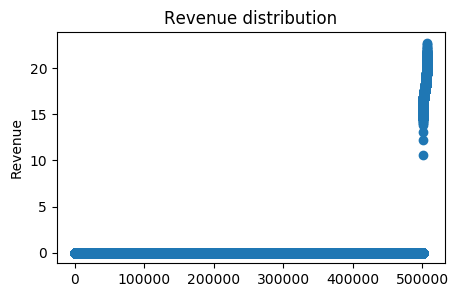

In [8]:
from matplotlib import pyplot as plt; plt.rcdefaults()
train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')
rev = train_df.groupby('fullVisitorId')["totals.transactionRevenue"].sum().reset_index()
plt.figure(figsize=(5,3))
plt.scatter(range(rev.shape[0]), np.sort(np.log1p(rev["totals.transactionRevenue"])))
plt.ylabel('Revenue')
plt.title('Revenue distribution')
plt.show()

#print(train_df['totals.transactionRevenue'].isna().sum())
#train_df['totals.transactionRevenue'] = train_df['totals.transactionRevenue'].fillna(0)
#print(train_df['totals.transactionRevenue'].isna().sum())
#print(rev.shape[0])

/home/ec2-user/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


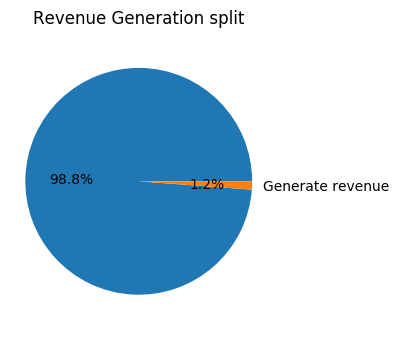

In [9]:
rev["RevAbsPercent"] = (rev["totals.transactionRevenue"]/rev["totals.transactionRevenue"].sum())*100
rev["PrecentBool"] = rev["RevAbsPercent"] > 0 
#print(rev.sort_values(by=["RevAbsPercent"],ascending=False))
#a = np.sum(rev["PrecentBool"])
#b = rev.shape[0]
#total_customers = (a / (a+b))*100
#print('Percentage of ids generating reveneue: ' + str(total_customers) )
#different method
z = rev["PrecentBool"].value_counts()
labels = [" ","Generate revenue"]
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
plt.pie(z.values,labels = labels,autopct='%1.1f%%', radius=10)
plt.axis('equal')
plt.title('Revenue Generation split')
plt.show()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


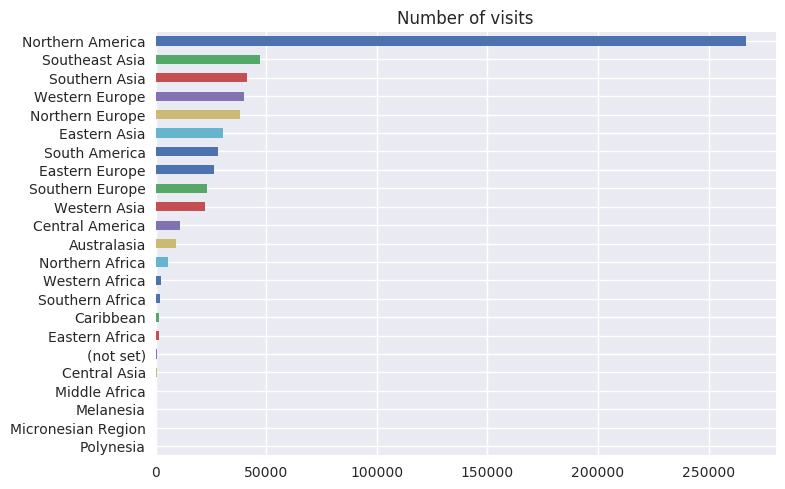

Number of people generating revenue
Mean Revenue in each continent


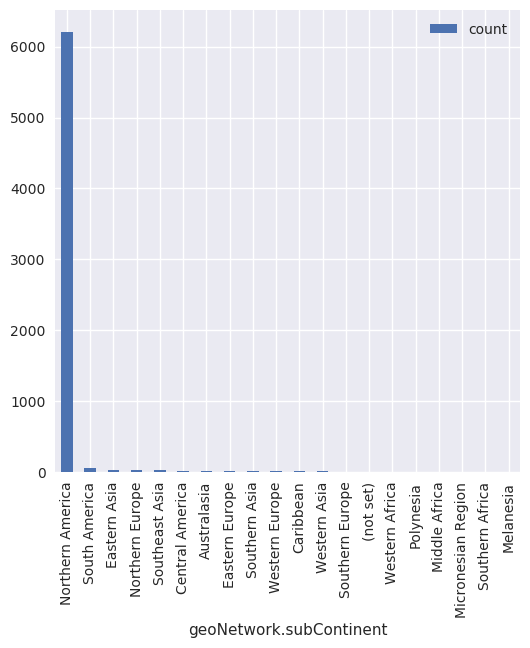

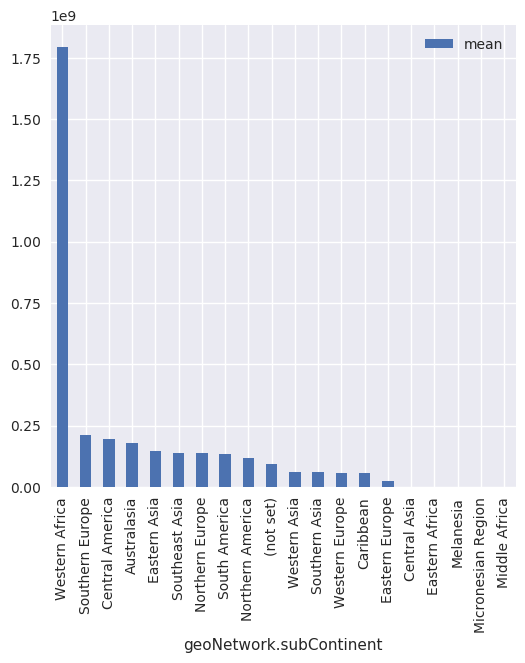

In [10]:
#train_df["geoNetwork.country"].isna().sum()
import seaborn  as sns
import statistics as st
#cnt_srs = train_df.groupby('geoNetwork.continent')['fullVisitorId'].agg(['count'])
#above code doesnt count total unique visitors, just counts non-NaN values
train_df['geoNetwork.subContinent'].value_counts().plot(kind='barh')
plt.title('Number of visits')
plt.gca().invert_yaxis()
#ax = sns.countplot(x = "geoNetwork.continent", y = "count")
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
print("Number of people generating revenue")
cnt_srs1 = train_df.groupby('geoNetwork.subContinent')['totals.transactionRevenue'].agg(['count']).sort_values(by = 'count', ascending = False).head(20).plot(kind="bar", ax=ax)

fig, ax = plt.subplots(figsize=(6,6))
print("Mean Revenue in each continent")
cnt_srs2 = train_df.groupby('geoNetwork.subContinent')['totals.transactionRevenue'].agg(['mean']).sort_values(by = 'mean', ascending = False).head(20).plot(kind="bar", ax=ax)
plt.show()

#cnt_srs1_sorted = cnt_srs1.sort_values(by = 'count',ascending= False)
#index = np.arange(len(set(train_df['geoNetwork.continent'])))
#names = cnt_srs1_sorted.iloc[0:]

#print(cnt_srs1_sorted.head())
#print(names)
#plt.bar(index, cnt_srs1_sorted['count'])
#plt.xticks(index, names , fontsize=10, rotation=30)
#plt.show()
#print(cnt_srs1)
#a = train_df['totals.transactionRevenue'].isna().sum()
#print('number'+ str(a))
#country = train_df["geoNetwork.country"].value_counts()
#ax = sns.countplot(x=country.index)

#country = train_df.groupby("fullVisitorId")["geoNetwork.country"]
#g = train_df["geoNetwork.country"].value_counts()
#country = train_df.groupby("fullVisitorId").agg({"geoNetwork.subContinent" : lambda x: st.mode(x)})
#some ids have 2 equally common values. No unique mode

In [ ]:
#rev = train_df.groupby('fullVisitorId').agg[{"transactionRevenue" : st.sum(), "timeOnSite": st.mean(), }

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


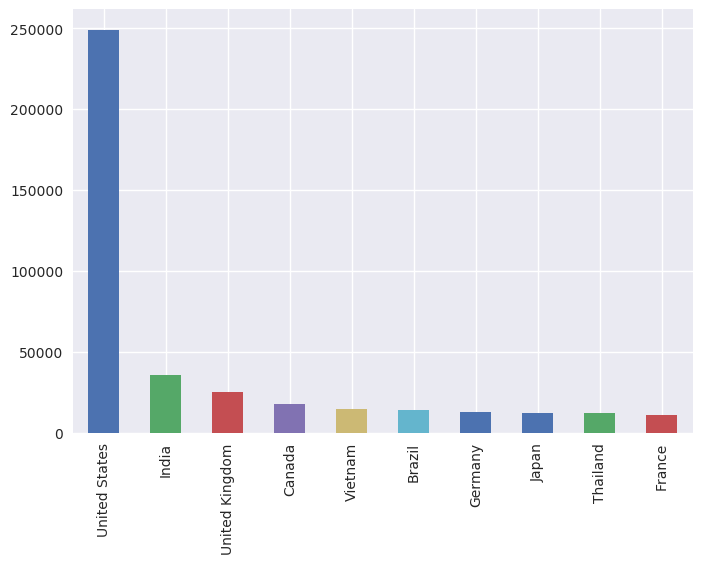

Number of visits generating revenue
Sum Revenue in each continent
Mean Revenue in each continent


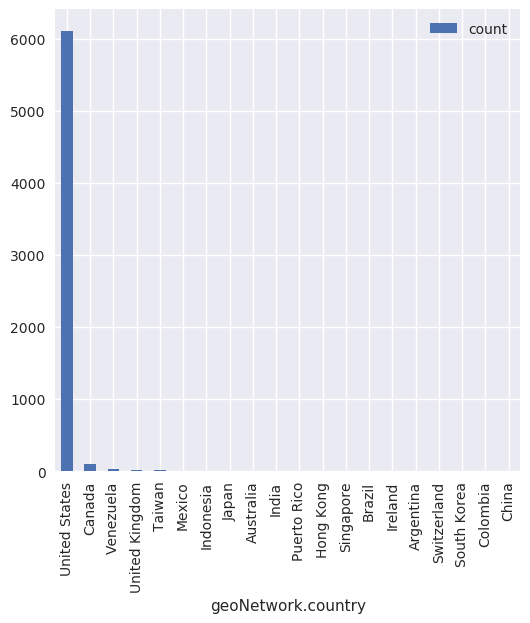

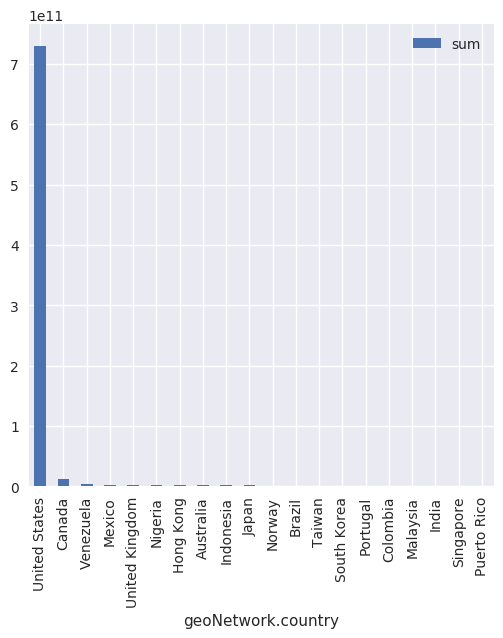

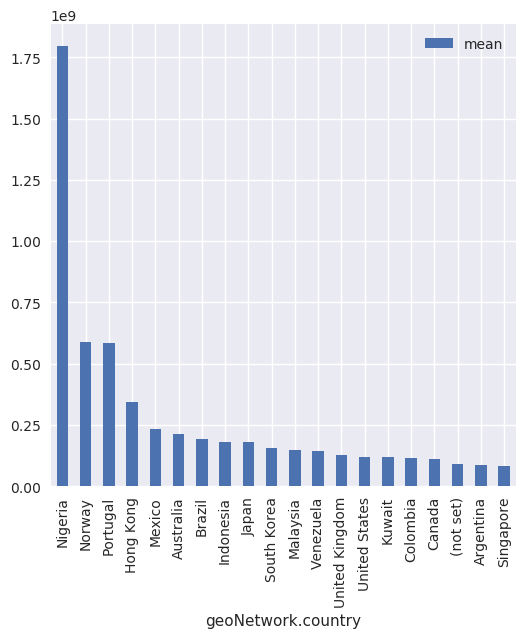

In [11]:
train_df['geoNetwork.country'].value_counts().head(10).plot(kind='bar')
plt.show()

fig, ax = plt.subplots(figsize=(6,6))
print("Number of visits generating revenue")
cnt_srs1 = train_df.groupby('geoNetwork.country')['totals.transactionRevenue'].agg(['count']).sort_values(by = 'count', ascending = False).head(20).plot(kind="bar", ax=ax)


fig, ax = plt.subplots(figsize=(6,6))
print("Sum Revenue in each continent")
cnt_srs3 = train_df.groupby('geoNetwork.country')['totals.transactionRevenue'].agg(['sum']).sort_values(by ='sum',ascending= False).head(20).plot(kind="bar", ax=ax)

fig, ax = plt.subplots(figsize=(6,6))
print("Mean Revenue in each continent")
cnt_srs2 = train_df.groupby('geoNetwork.country')['totals.transactionRevenue'].agg(['mean']).sort_values(by ='mean',ascending= False).head(20).plot(kind="bar", ax=ax)
plt.show()

In [49]:
#Convert to cateorical values
#print(train_df["device.deviceCategory"])
#device = {"device.deviceCategory" : {"desktop" : 0, "mobile" : 1, "tablet" : 2}}
#train_df.replace(device, inplace = True) 

Device-wise visit distribution  (this is not unique customers) 


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


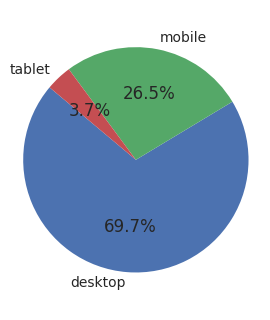

Device-wise Revenue distribution


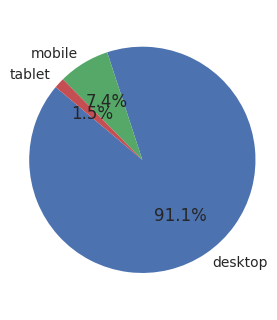

In [11]:
#fig, ax = plt.subplots(figsize=(5,3))
#cnt_srs1 = train_df.groupby("device.deviceCategory")['totals.transactionRevenue'].agg(['count']).sort_values(by = 'count', ascending = False).plot(kind="bar", ax=ax)
device = train_df["device.deviceCategory"].value_counts()
labels = device.index 
print("Device-wise visit distribution  (this is not unique customers) ")
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
plt.pie(device.values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
device_revenue = train_df.groupby("device.deviceCategory")['totals.transactionRevenue'].agg(['count'])
labels = train_df["device.deviceCategory"].unique()
print("Device-wise Revenue distribution")
plt.pie(device_revenue['count'], labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

NIGERIA  : Device-wise visit distribution  (this is not unique customers) 


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


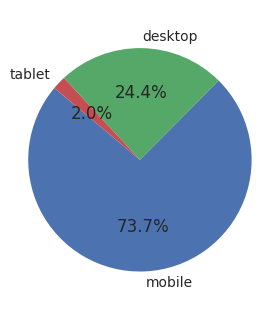

NIGERIA : Device-wise Revenue distribution


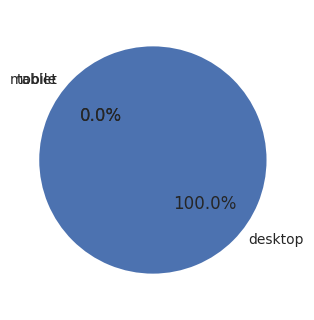

In [13]:
# device.language ---> not available in demo dataset
nigeria = train_df.loc[train_df["geoNetwork.country"] == "Nigeria"]
device_nigeria = nigeria['device.deviceCategory'].value_counts()
labels = device_nigeria.index
print("NIGERIA  : Device-wise visit distribution  (this is not unique customers) ")
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
plt.pie(device_nigeria.values, labels=labels, autopct='%1.1f%%',radius = 0.01, startangle=140)
plt.axis('equal')
plt.show()
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
nigeria_revenue = nigeria.groupby('device.deviceCategory')['totals.transactionRevenue'].agg(['count']).reset_index()
labels= nigeria_revenue["device.deviceCategory"]
print("NIGERIA : Device-wise Revenue distribution")
plt.pie(nigeria_revenue['count'], labels=labels, autopct='%1.1f%%',radius = 0.01, startangle=140)
plt.axis('equal')
plt.show()


NORWAY  : Device-wise visit distribution  (this is not unique customers) 


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


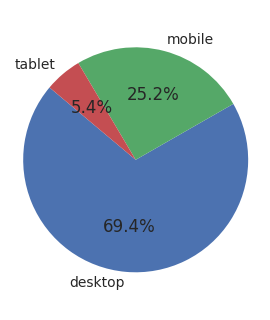

NORWAY : Device-wise Revenue distribution


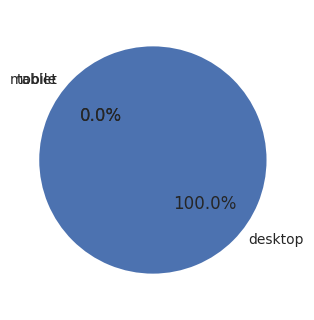

In [12]:
norway = train_df.loc[train_df["geoNetwork.country"] == "Norway"]
device_norway = norway['device.deviceCategory'].value_counts()
labels = device_norway.index
print("NORWAY  : Device-wise visit distribution  (this is not unique customers) ")
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
plt.pie(device_norway.values, labels=labels, autopct='%1.1f%%', radius =0.5, startangle=140)
plt.axis('equal')
plt.show()

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
norway_revenue = norway.groupby('device.deviceCategory')['totals.transactionRevenue'].agg(['count']).reset_index()
labels= norway_revenue["device.deviceCategory"]
print("NORWAY : Device-wise Revenue distribution")
plt.pie(norway_revenue['count'], labels=labels, autopct='%1.1f%%',radius = 0.5, startangle=140)
plt.axis('equal')
plt.show()

PORTUAL : Device-wise visit distribution  (this is not unique customers) 


/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


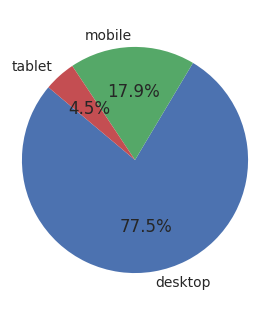

PORTUGAL : Device-wise Revenue distribution


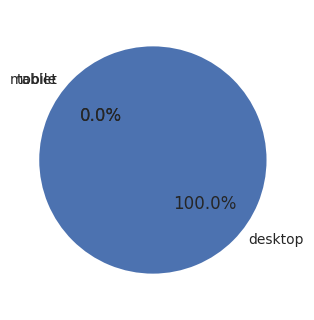

In [15]:
portugal = train_df.loc[train_df["geoNetwork.country"] == "Portugal"]
device_portugal = portugal['device.deviceCategory'].value_counts()
labels = device_portugal.index
print("PORTUAL : Device-wise visit distribution  (this is not unique customers) ")
fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
plt.pie(device_portugal.values, labels=labels, autopct='%1.1f%%',radius = 0.5, startangle=140)
plt.axis('equal')
plt.show()

fig = plt.figure(figsize=(5,3))
ax = fig.add_axes((0,0,.5,1))
portugal_revenue = portugal.groupby('device.deviceCategory')['totals.transactionRevenue'].agg(['count']).reset_index()
labels= portugal_revenue["device.deviceCategory"]
print("PORTUGAL : Device-wise Revenue distribution")
plt.pie(portugal_revenue['count'], labels=labels, autopct='%1.1f%%',radius = 0.5, startangle=140)
plt.axis('equal')
plt.show()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


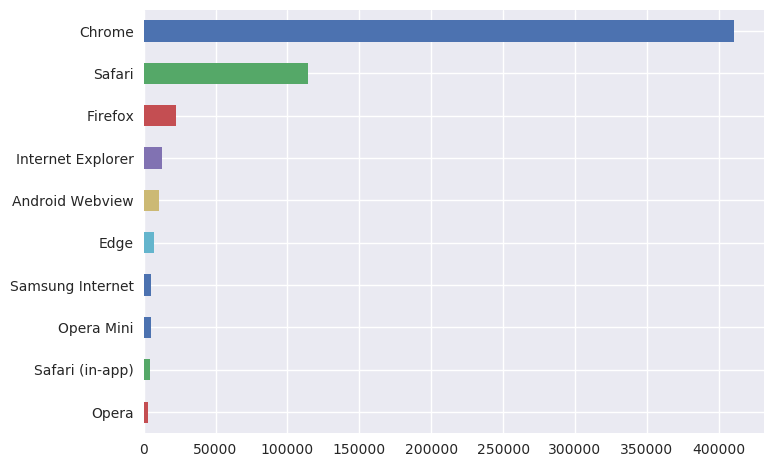

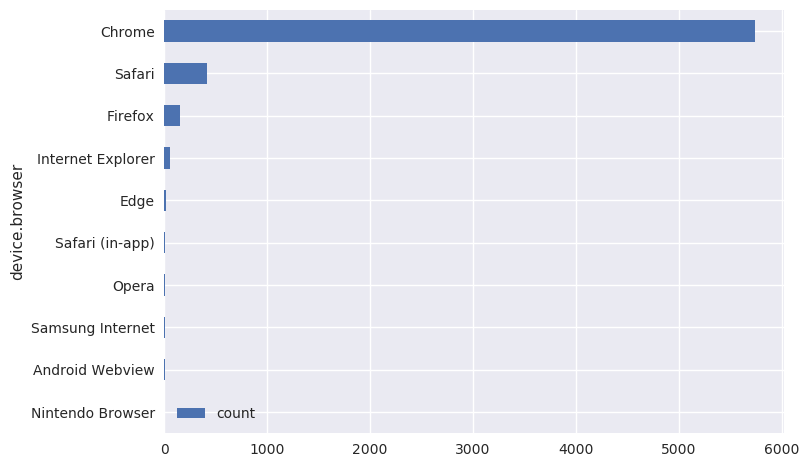

In [13]:
#browser = sns.countplot(y ="device.browser", data = train_df)
#plt.gca().invert_yaxis()
#plt.show()


train_df["device.browser"].value_counts().head(10).plot(kind='barh')
#ypos = np.arange(len(browser.index))
#plt.barh(ypos,browser.values,align='center')
#plt.yticks(ypos,browser.index)
plt.gca().invert_yaxis()
plt.show()
plt.figure()
browser = train_df.groupby("device.browser")['totals.transactionRevenue'].agg(['count']).sort_values(by = 'count', ascending = False).head(10).plot(kind ='barh')
plt.gca().invert_yaxis()
plt.show()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


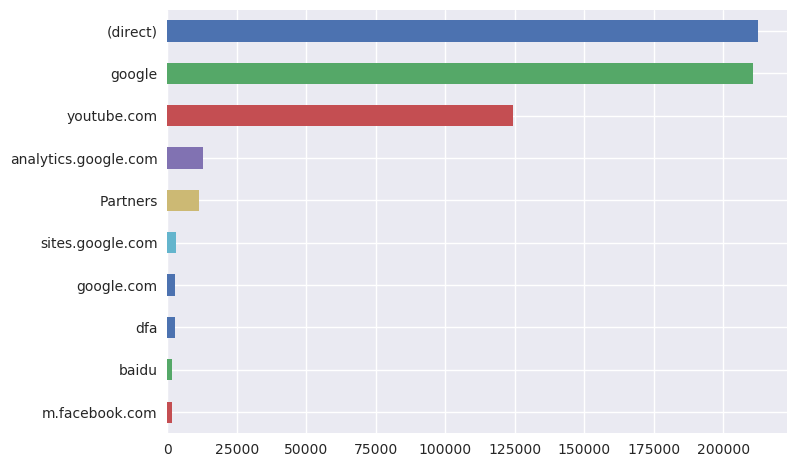

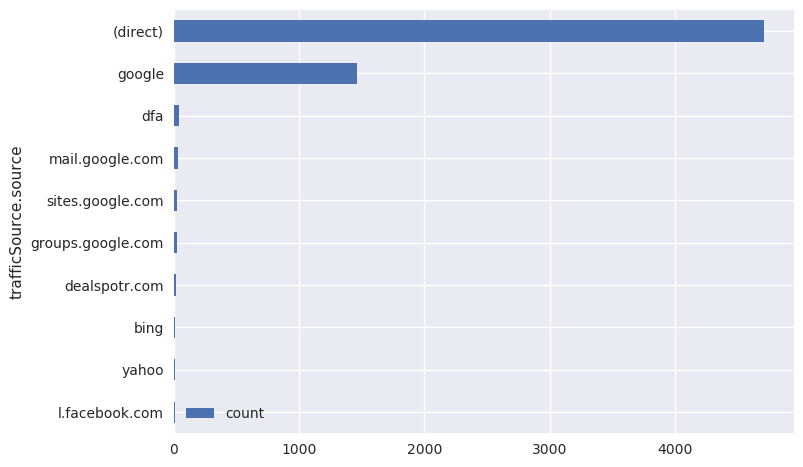

In [14]:
# "totals.timeOnSite","totals.hits","totals.newVisits"
train_df["trafficSource.source"].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()
train_df.groupby('trafficSource.source')['totals.transactionRevenue'].agg(['count']).sort_values(by = 'count', ascending = False).head(10).plot(kind ='barh')
plt.gca().invert_yaxis()
plt.show()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


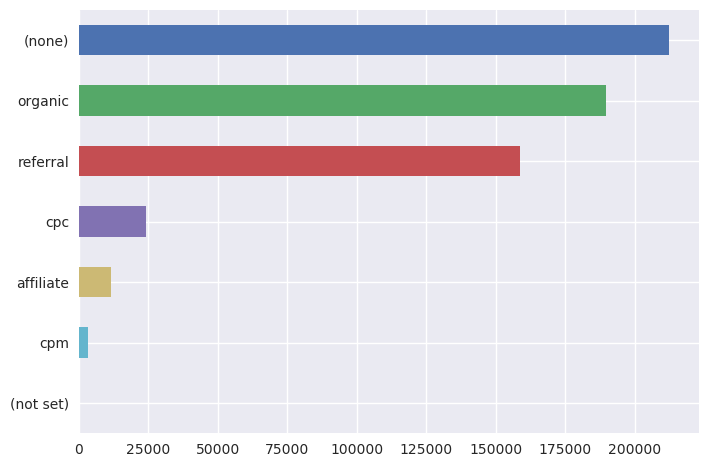

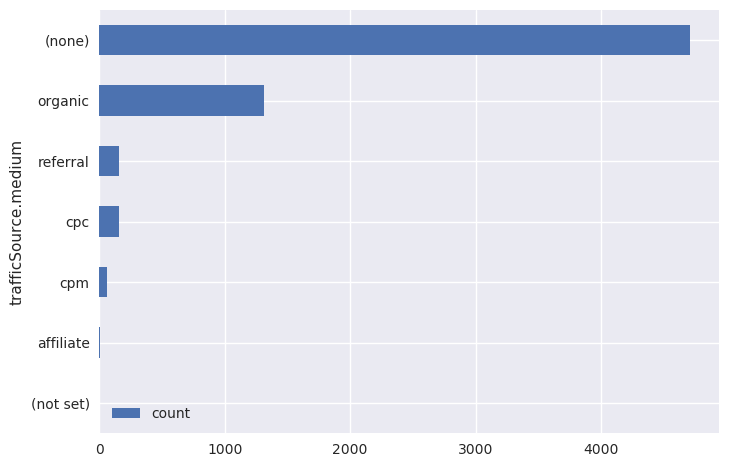

In [18]:
train_df["trafficSource.medium"].value_counts().head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()
train_df.groupby('trafficSource.medium')['totals.transactionRevenue'].agg(['count']).sort_values(by = 'count', ascending = False).head(10).plot(kind ='barh')
plt.gca().invert_yaxis()
plt.show()

/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


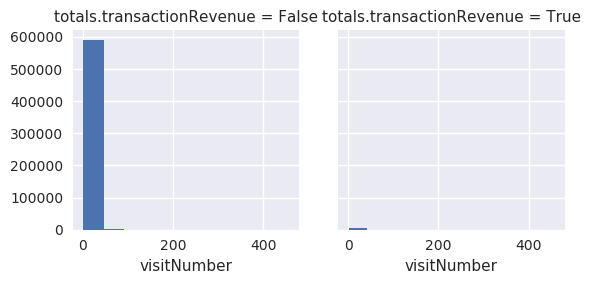

Distribution of revenue generators
(6398, 4)


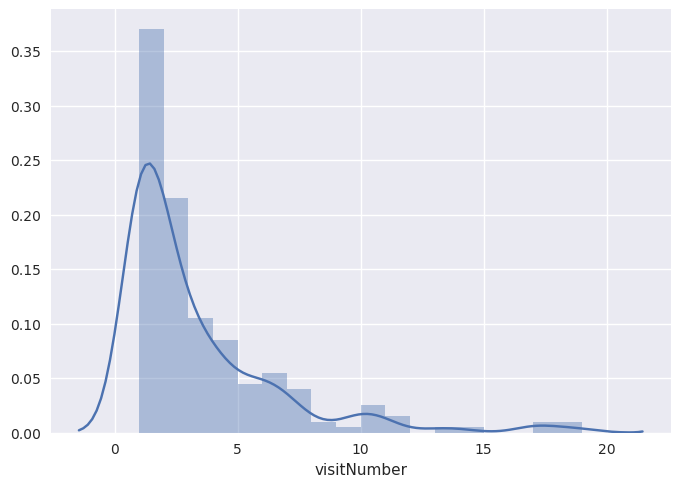

Distribution of non-reveue generators
(593602, 4)


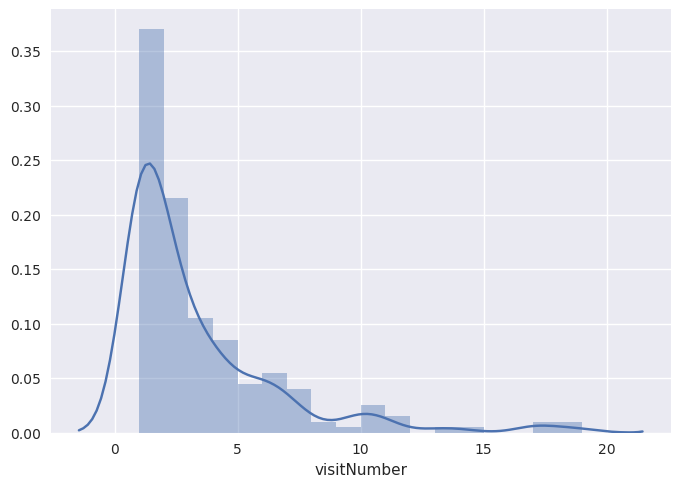

In [15]:
#import plotly.plotly as py
#import plotly.graph_objs as go
#print(train_df["visitNumber"].value_counts())
new = train_df[["visitNumber","totals.transactionRevenue","fullVisitorId","visitId"]]
train_df['totals.transactionRevenue'] = train_df['totals.transactionRevenue'].fillna(0)
new["totals.transactionRevenue"] = new["totals.transactionRevenue"] > 0
h=sns.FacetGrid(new, col="totals.transactionRevenue")
h = h.map(plt.hist,"visitNumber")
plt.show()

print("Distribution of revenue generators")
new_1 = new.loc[new["totals.transactionRevenue"]== True] 
print(new_1.shape)
sns.distplot(new_1["visitNumber"].head(200))
plt.show()

print("Distribution of non-reveue generators")
new_2 = new.loc[new["totals.transactionRevenue"]== False] 
print(new_2.shape)
sns.distplot(new_1["visitNumber"].head(200))
plt.show()



/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


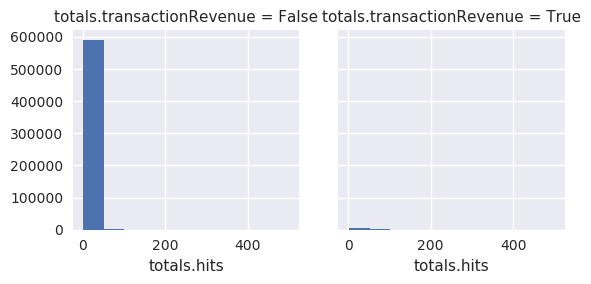

Distribution of revenue generators
(6398, 4)


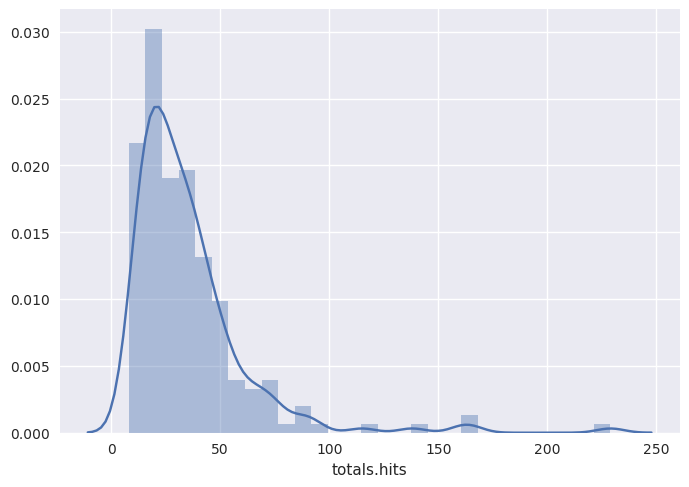

Distribution of non-reveue generators
(593602, 4)


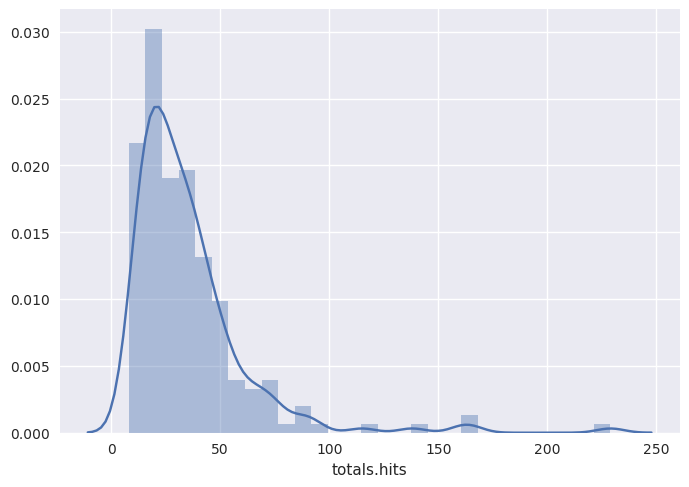

In [20]:
import seaborn as sns
#'totals.hits', 'totals.pageviews'
new = train_df[["totals.hits","totals.transactionRevenue","fullVisitorId","visitId"]]
train_df['totals.transactionRevenue'] = train_df['totals.transactionRevenue'].fillna(0)
new["totals.transactionRevenue"] = new["totals.transactionRevenue"] > 0
new["totals.hits"] = new["totals.hits"].astype('float')
h=sns.FacetGrid(new, col="totals.transactionRevenue")
h = h.map(plt.hist,"totals.hits")
plt.show()

print("Distribution of revenue generators")
new_1 = new.loc[new["totals.transactionRevenue"]== True] 
print(new_1.shape)
sns.distplot(new_1["totals.hits"].head(200))
plt.show()
    
print("Distribution of non-reveue generators")
new_2 = new.loc[new["totals.transactionRevenue"]== False] 
print(new_2.shape)
sns.distplot(new_1["totals.hits"].head(200))
plt.show()


/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ec2-user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/ec2-user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (pr

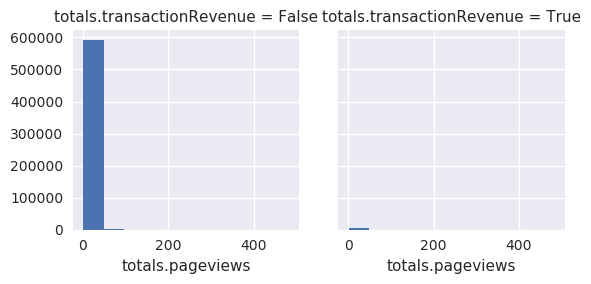

Distribution of revenue generators
(6398, 4)


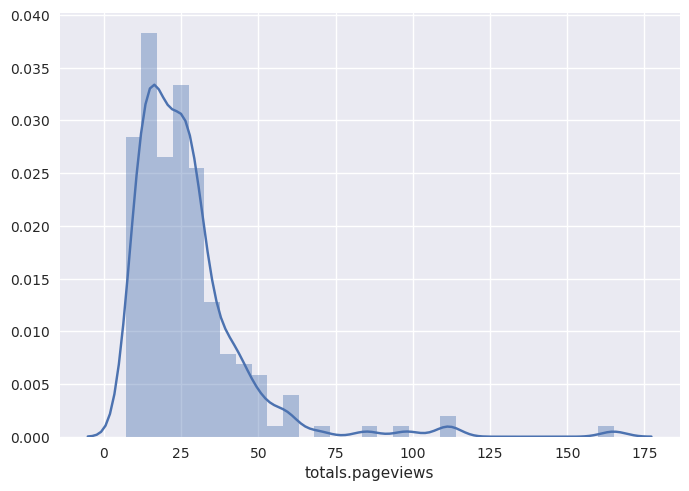

Distribution of non-reveue generators
(593602, 4)


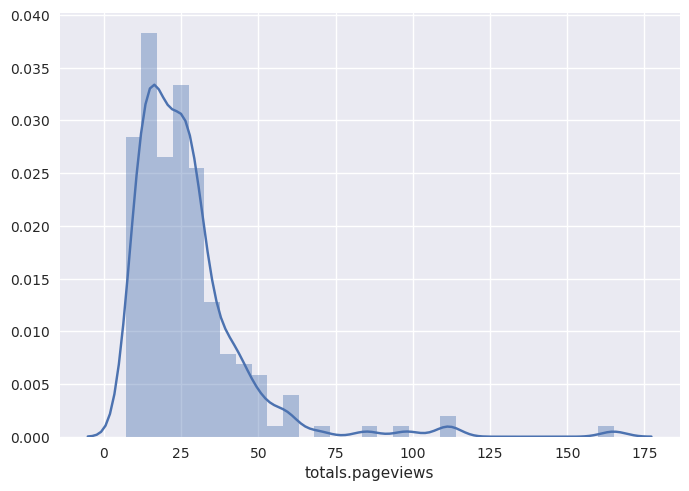

In [16]:
new = train_df[['totals.pageviews',"totals.transactionRevenue","fullVisitorId","visitId"]]
train_df['totals.transactionRevenue'] = train_df['totals.transactionRevenue'].fillna(0)
new["totals.transactionRevenue"] = new["totals.transactionRevenue"] > 0
new['totals.pageviews'] = new['totals.pageviews'].astype('float')
h=sns.FacetGrid(new, col="totals.transactionRevenue")
h = h.map(plt.hist,'totals.pageviews')
plt.show()

print("Distribution of revenue generators")
new_1 = new.loc[new["totals.transactionRevenue"]== True] 
print(new_1.shape)
sns.distplot(new_1['totals.pageviews'].head(200))
plt.show()

print("Distribution of non-reveue generators")
new_2 = new.loc[new["totals.transactionRevenue"]== False] 
print(new_2.shape)
sns.distplot(new_1['totals.pageviews'].head(200))
plt.show()


In [21]:
train_df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.operatingSystem,geoNetwork.continent,geoNetwork.country,geoNetwork.subContinent,totals.hits,totals.pageviews,totals.visits,trafficSource.medium,trafficSource.source,totals.transactionRevenue
0,Organic Search,20171016,3162355547410993243,1508198450,1,1508198450,Firefox,desktop,Windows,Europe,Germany,Western Europe,1,1,1,organic,google,0.0
1,Referral,20171016,8934116514970143966,1508176307,6,1508176307,Chrome,desktop,Chrome OS,Americas,United States,Northern America,2,2,1,referral,sites.google.com,0.0
2,Direct,20171016,7992466427990357681,1508201613,1,1508201613,Chrome,mobile,Android,Americas,United States,Northern America,2,2,1,(none),(direct),0.0
3,Organic Search,20171016,9075655783635761930,1508169851,1,1508169851,Chrome,desktop,Windows,Asia,Turkey,Western Asia,2,2,1,organic,google,0.0
4,Organic Search,20171016,6960673291025684308,1508190552,1,1508190552,Chrome,desktop,Windows,Americas,Mexico,Central America,2,2,1,organic,google,0.0


In [7]:
train_id = train_df["fullVisitorId"].values
train_df["channelGrouping"] = train_df["channelGrouping"].astype('category')
train_df["device.browser"] = train_df["device.browser"].astype('category')
train_df["device.deviceCategory"] = train_df["device.deviceCategory"].astype('category')
train_df["device.operatingSystem"] = train_df["device.operatingSystem"].astype('category')
train_df["geoNetwork.continent"] = train_df["geoNetwork.continent"].astype('category')
train_df["geoNetwork.country"] = train_df["geoNetwork.country"].astype('category')
train_df["geoNetwork.subContinent"] = train_df["geoNetwork.subContinent"].astype('category')
train_df["trafficSource.medium"] = train_df["trafficSource.medium"].astype('category')
train_df["trafficSource.source"] = train_df["trafficSource.source"].astype('category')
print(train_df.dtypes)
cat_columns = train_df.select_dtypes(['category']).columns
train_df[cat_columns] = train_df[cat_columns].apply(lambda x: x.cat.codes)

num_cols = ["totals.hits", "totals.pageviews", 'totals.visits',  'totals.transactionRevenue']    
for col in num_cols:
    train_df[col] = train_df[col].astype(float)

channelGrouping              category
date                            int64
fullVisitorId                  object
visitId                         int64
visitNumber                     int64
visitStartTime                  int64
device.browser               category
device.deviceCategory        category
device.operatingSystem       category
geoNetwork.continent         category
geoNetwork.country           category
geoNetwork.subContinent      category
totals.hits                    object
totals.pageviews               object
totals.visits                  object
trafficSource.medium         category
trafficSource.source         category
totals.transactionRevenue      object
dtype: object


In [11]:
import datetime
train_df['date'] = train_df['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))

print(train_df['date'].values[0])
#print(new['date'].values[0])

2017-10-16


In [34]:
#train_df['date'] = new['date']
dev_df = train_df[train_df['date']<=datetime.date(2017,5,31)]
val_df = train_df[train_df['date']>datetime.date(2017,5,31)]
dev_y = np.log1p(dev_df["totals.transactionRevenue"].values)
val_y = np.log1p(val_df["totals.transactionRevenue"].values)

dev_X = dev_df.drop(["date","fullVisitorId","visitId","visitNumber"],axis=1)
val_X = val_df.drop(["date","fullVisitorId","visitId","visitNumber"],axis=1)


dev_X["totals.transactionRevenue"] = dev_X["totals.transactionRevenue"].astype('float')
dev_X["totals.transactionRevenue"] = dev_X["totals.transactionRevenue"].fillna(0) 
dev_X["totals.pageviews"] = dev_X["totals.pageviews"].astype('float')
dev_X["totals.pageviews"] = dev_X["totals.pageviews"].fillna(dev_X["totals.pageviews"].mode)
dev_X = dev_X.drop(["totals.pageviews"],axis=1)

print(dev_X.dtypes)
from sklearn import linear_model
print(dev_X.isna().sum())
#print(dev_X.isnull().sum())
print(dev_X.dtypes)

lm = linear_model.LinearRegression()
model = lm.fit(dev_X,dev_y)
pedictions = lm.predict(val_df)
pint(predictions)[0:5]

channelGrouping                 int8
visitStartTime                 int64
device.browser                  int8
device.deviceCategory           int8
device.operatingSystem          int8
geoNetwork.continent            int8
geoNetwork.country             int16
geoNetwork.subContinent         int8
totals.hits                  float64
totals.visits                float64
trafficSource.medium            int8
trafficSource.source           int16
totals.transactionRevenue    float64
dtype: object
channelGrouping              0
visitStartTime               0
device.browser               0
device.deviceCategory        0
device.operatingSystem       0
geoNetwork.continent         0
geoNetwork.country           0
geoNetwork.subContinent      0
totals.hits                  0
totals.visits                0
trafficSource.medium         0
trafficSource.source         0
totals.transactionRevenue    0
dtype: int64
channelGrouping                 int8
visitStartTime                 int64
device.browser 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [33]:
temp = train_df['date'].values[0]
print (type(temp))
print (temp)

print ("\nMethod-1")
#upar wale cell me jo error aa rha hai that is because
#tumne string ko jb separate kiya hai us time pr pain ho rha hai.
#tum string ko sahi se separate karo toh it will work.
#niche ek method de rakha hai mene jisme, you dont need to maually
#enter index to separate the string.
print (str(temp))
print (str(temp).split('-'))
year, month, day = int(str(temp).split('-')[0]), int(str(temp).split('-')[1]), int(str(temp).split('-')[2])
print (day, month, year)
print (type(day), type(month), type(year))


print ("\nMethod-2")
year, month, day = temp.year, temp.month, temp.day
print (day, month, year)
print (type(day), type(month), type(year))



<class 'datetime.date'>
2017-10-16

Method-1
2017-10-16
['2017', '10', '16']
16 10 2017
<class 'int'> <class 'int'> <class 'int'>

Method-2
16 10 2017
<class 'int'> <class 'int'> <class 'int'>
